In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

In [6]:
import json

# load in a "sample config file" for the 2018 signal samples
#jsonfile = 'skimmed_bkg_2018_v10_miniAOD'
#jsonfile = 'skimmed_data_2018_MET_v3'
#with open(f"./configs/sample_configs/{jsonfile}.json","r") as fin:
with open(f"../../configs/sample_configs/bkg/bkg_2018_v11_miniAOD.json") as fin:   
    samp_cfg = json.load(fin)

In [7]:
from XRootD import client
loc = samp_cfg[0]['location']
blacklist = samp_cfg[0]['blacklist']
xrdClient = client.FileSystem("root://cmseos.fnal.gov")
status, flist = xrdClient.dirlist(loc) # get list of files in directory
# select only non-blacklisted root files, prepend the root://cmsxrootd.fnal.gov/ to the file paths
fullList = ["root://cmseos.fnal.gov/"+loc+"/"+item.name for item in flist if (('.root' in item.name) and (item.name not in blacklist))]

In [8]:
import uproot

t = uproot.open(fullList[0])['ntuples/outT']

In [9]:
for branch in t.keys():
    #if 'vtx' in branch:
    print(branch)

#print("\n".join(t.keys()))


trigFired
eventNum
lumiSec
runNum
trig_HLT_PFMET90_PFMHT90_IDTight
trig_HLT_PFMET100_PFMHT100_IDTight
trig_HLT_PFMET110_PFMHT110_IDTight
trig_HLT_PFMET120_PFMHT120_IDTight
trig_HLT_PFMET130_PFMHT130_IDTight
trig_HLT_PFMET140_PFMHT140_IDTight
trig_HLT_PFMETTypeOne110_PFMHT110_IDTight
trig_HLT_PFMETTypeOne120_PFMHT120_IDTight
trig_HLT_PFMETTypeOne130_PFMHT130_IDTight
trig_HLT_PFMETTypeOne140_PFMHT140_IDTight
trig_HLT_PFMET100_PFMHT100_IDTight_PFHT60_v9
trig_HLT_PFJet15
trig_HLT_PFJet25
trig_HLT_PFJet40
trig_HLT_PFJet60
trig_HLT_PFJet80
trig_HLT_PFJet140
trig_HLT_PFJet200
trig_HLT_PFJet260
trig_HLT_PFJet320
trig_HLT_PFJet400
trig_HLT_PFJet450
trig_HLT_PFJet500
trig_HLT_PFJet550
trig_HLT_AK4PFJet30
trig_HLT_AK4PFJet50
trig_HLT_AK4PFJet80
trig_HLT_AK4PFJet100
trig_HLT_AK4PFJet120
trig_HLT_DoubleEle27_CaloIdL_MW
trig_HLT_Ele30_WPTight_Gsf
trig_HLT_DoubleEle8_CaloIdM_TrackIdM_Mass8_PFHT350
trig_HLT_Ele17_CaloIdM_TrackIdM_PFJet30
trig_HLT_Ele15_CaloIdL_TrackIdL_IsoVL_PFJet30
trig_HLT_Ele40_WPT

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_VR_collinear_neg_good_vtx_v7_NJetG2'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [ ]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}_moreMC.coffea')[0]

In [ ]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [ ]:
utils.get_signal_list_of_histograms(sig_histo)

## Plot 1D -- Background

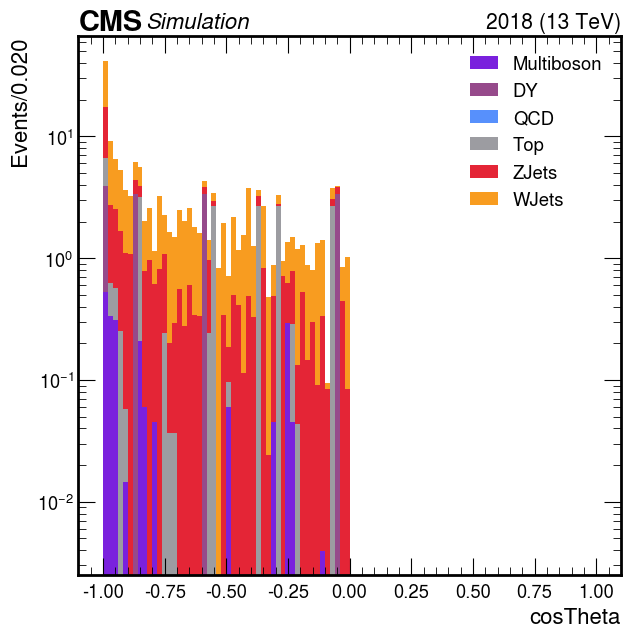

In [149]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': './plots/',
    'outName': f'background_VR_coscollinear.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


plt.title('')
plt.legend()
plt.show()

## Plot 1D -- Background Stacked to 1D

/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


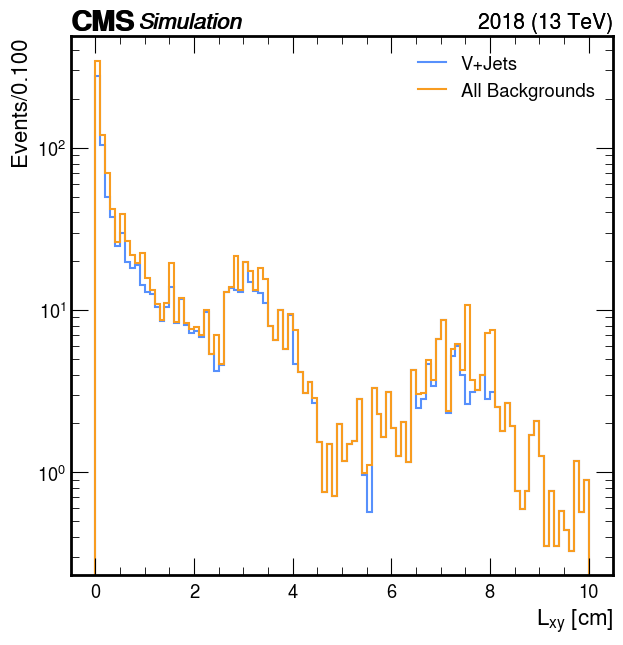

In [98]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': './plots/',
    'outName': f''
}

# bkg
style_dict['label'] = 'V+Jets'
ptools.plot_bkg_1d_stacked(bkg_histo, plot_dict, style_dict,  processes=['WJets','ZJets'])

style_dict['label'] = 'All Backgrounds'
ptools.plot_bkg_1d_stacked(bkg_histo, plot_dict, style_dict, processes='all')

plt.legend()
plt.show()

## Plot 1D -- Signal

Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png


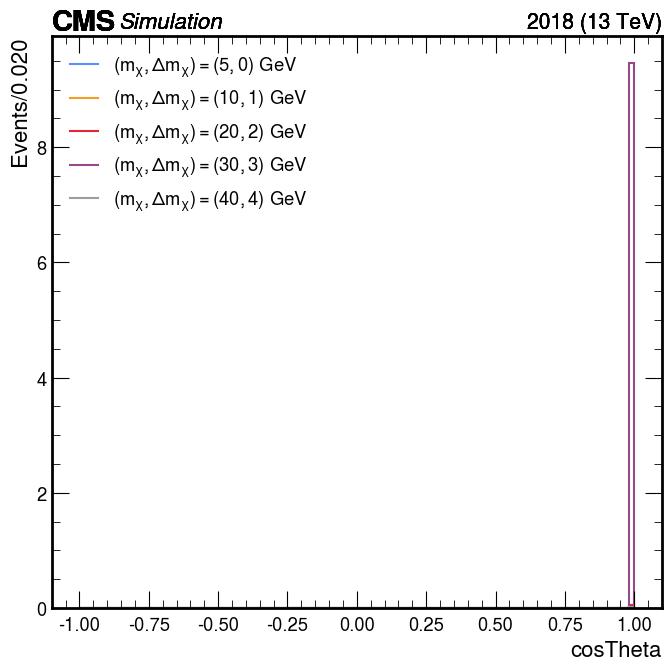

In [42]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png'
}

# signal points
m1s = [5, 10, 20, 30, 40]
deltas = [0.1]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png


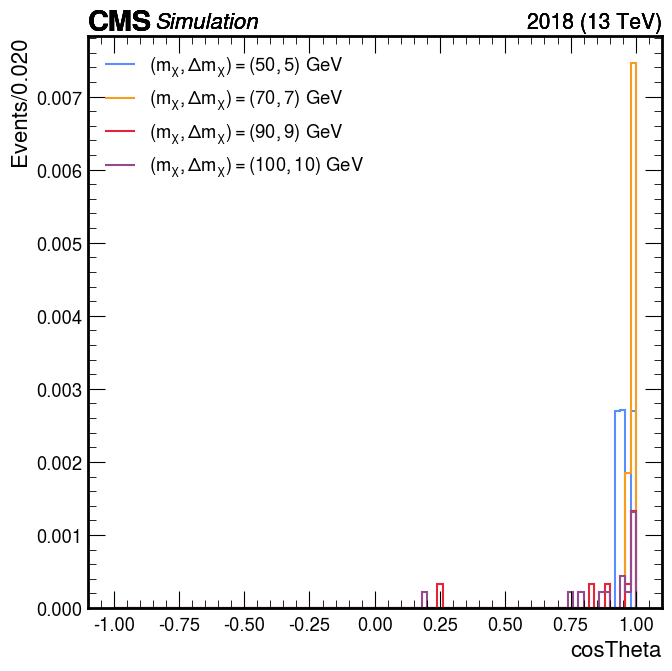

In [43]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png'
}

# signal points
m1s = [50, 70, 90, 100]
deltas = [0.1]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png


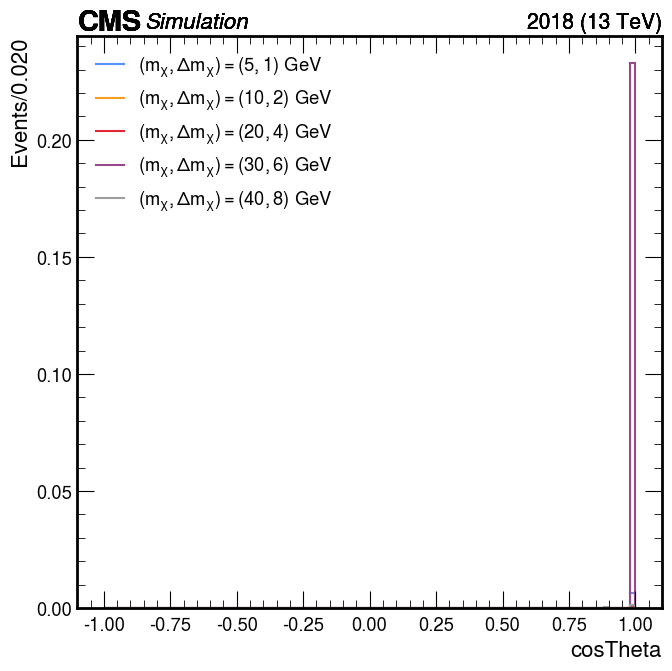

In [44]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png'
}

# signal points
m1s = [5, 10, 20, 30, 40]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png


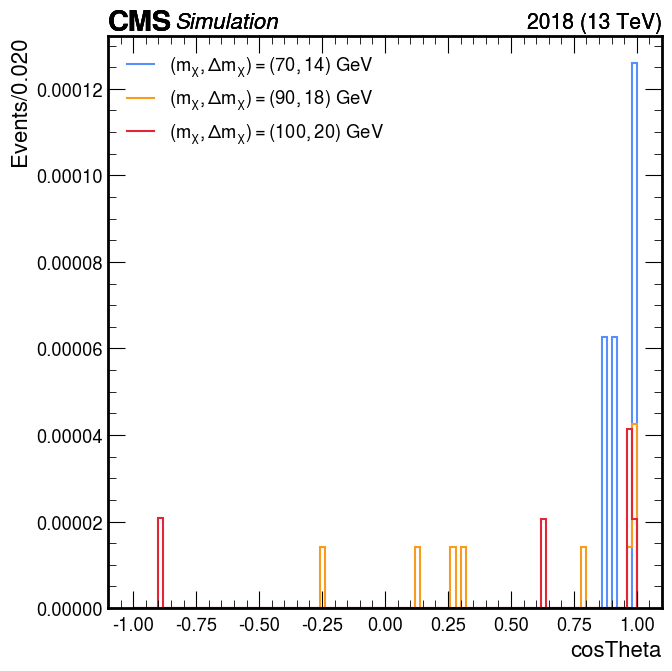

In [45]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png'
}

# signal points
m1s = [70, 90, 100]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

## Data and Background

Saved: ./plots/data_bkg/jetMET//data_background_VR_nJet.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/jetMET//data_background_VR_nJet.png


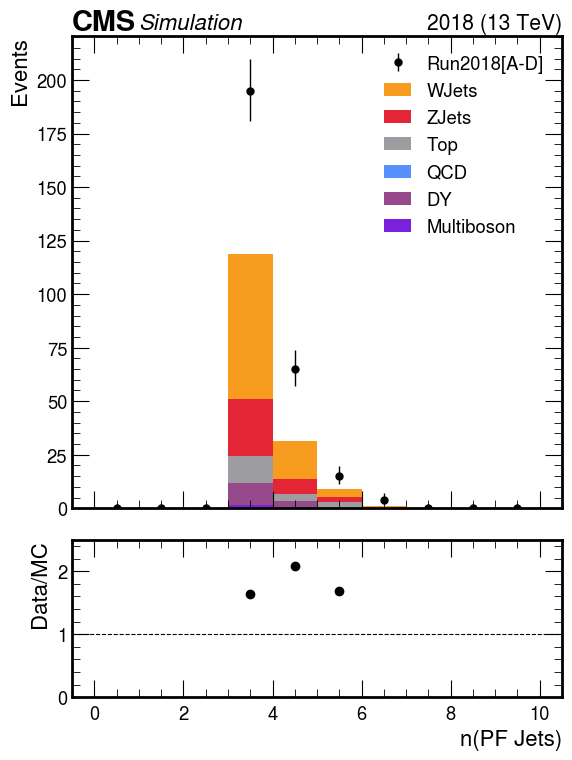

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'n(PF Jets)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_background_VR_nJet.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mass.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mass.png


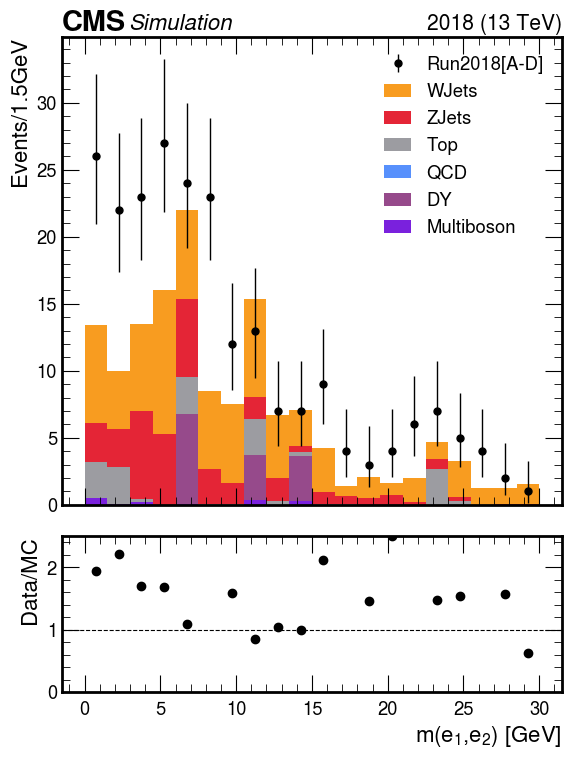

In [18]:
variable = 'sel_vtx_mass'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"m($e_{1}$,$e_{2}$) [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/1.5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_dR.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_dR.png


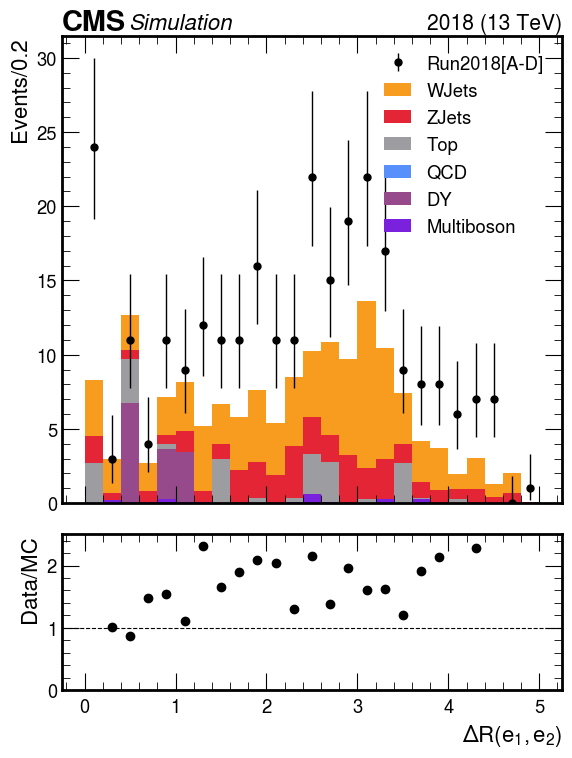

In [19]:
variable = 'sel_vtx_dR'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\Delta$R($e_{1},e_{2}$)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.2',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy.png


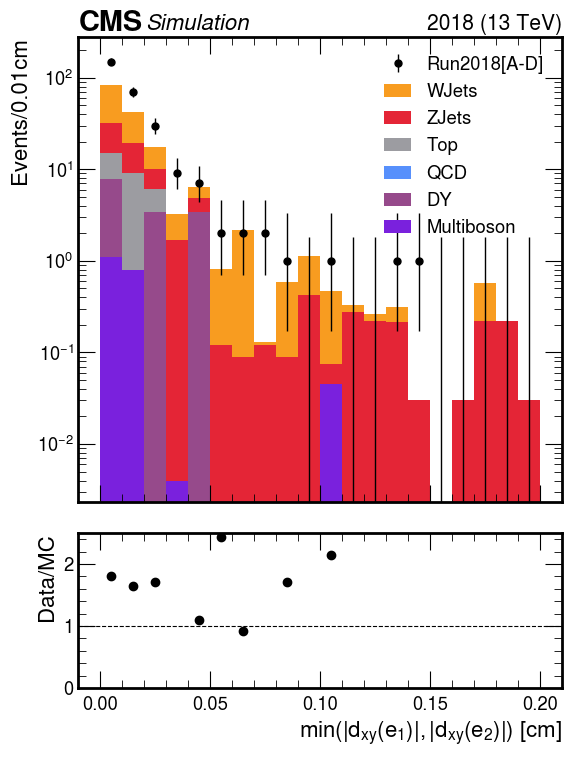

In [20]:
variable = 'sel_vtx_mindxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min($|d_{xy}(e_{1})|,|d_{xy}(e_{2})|$) [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.01cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

In [19]:
cut_map = {}

for idx, cut_idx in enumerate(utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = True)):
    cut_map[cut_idx] = utils.get_signal_list_of_cuts(sig_histo)[idx]

print(cut_map)

{'all': 'Preselections', 'hasVtx': 'n(good vertex) > 0', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'Vtx CosCollinear < 0'}


Saved: ./plots/data_bkg/Lxy//data_VR_sel_vtx_vxy1_cut_j1pt_80.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/Lxy//data_VR_sel_vtx_vxy1_cut_j1pt_80.png


'\nfor cut in cut_map.keys():\n    if \'all\' in cut or \'hasVtx\' in cut:\n        continue\n    \n    fig, ax = plt.subplots(figsize=(6,6))\n    \n    style_dict[\'fig\'] = fig\n    style_dict[\'ax\'] = ax\n\n    plot_dict[\'cut\'] = cut\n\n    print(f\'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}\')\n    style_dict[\'outName\'] = f\'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}\'\n    \n    ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)\n'

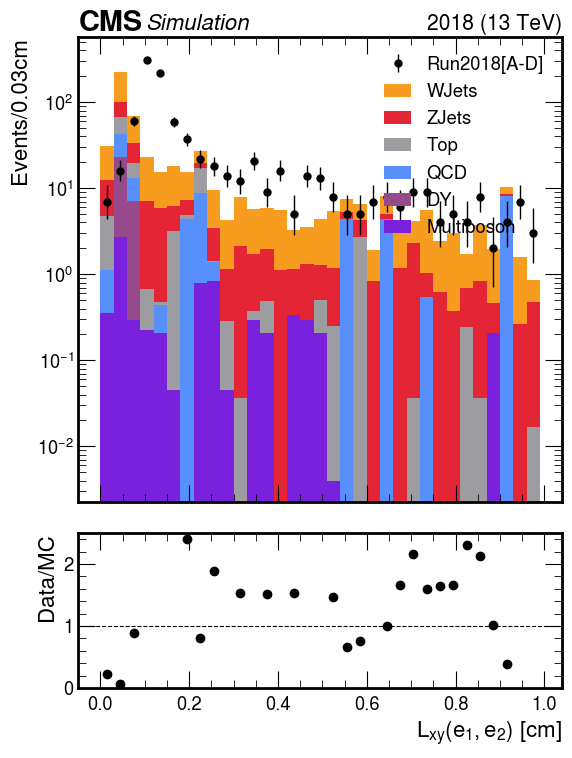

In [28]:
variable = 'sel_vtx_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut7',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.03cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/Lxy/',
    'outName': f'data_VR_{variable}_cut_j1pt_80.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

'''
for cut in cut_map.keys():
    if 'all' in cut or 'hasVtx' in cut:
        continue
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    style_dict['fig'] = fig
    style_dict['ax'] = ax

    plot_dict['cut'] = cut

    print(f'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}')
    style_dict['outName'] = f'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}'
    
    ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)
'''

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_vxy10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_vxy10.png


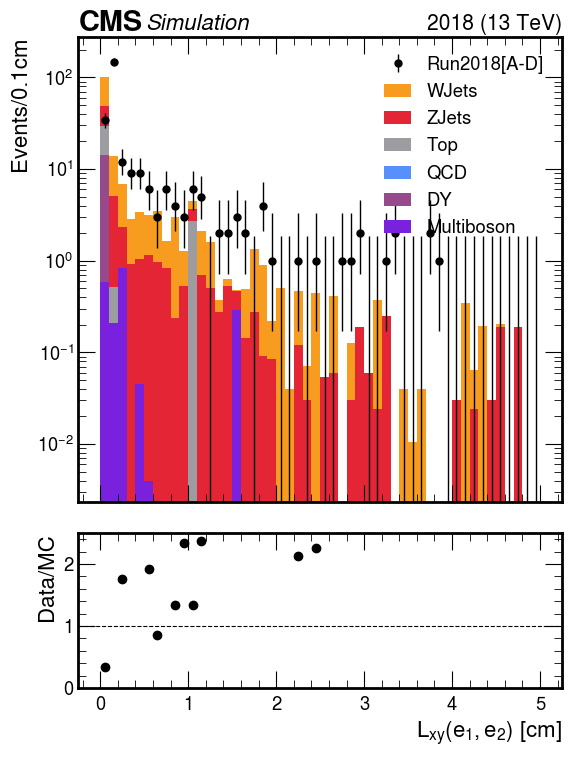

In [23]:
variable = 'sel_vtx_vxy10'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.1cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_vxy100.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_vxy100.png


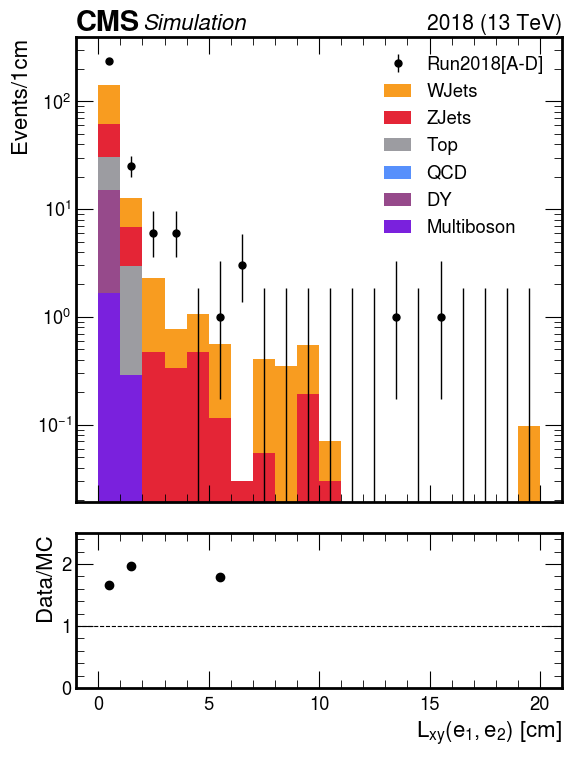

In [24]:
variable = 'sel_vtx_vxy100'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/1cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_METdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_METdPhi.png


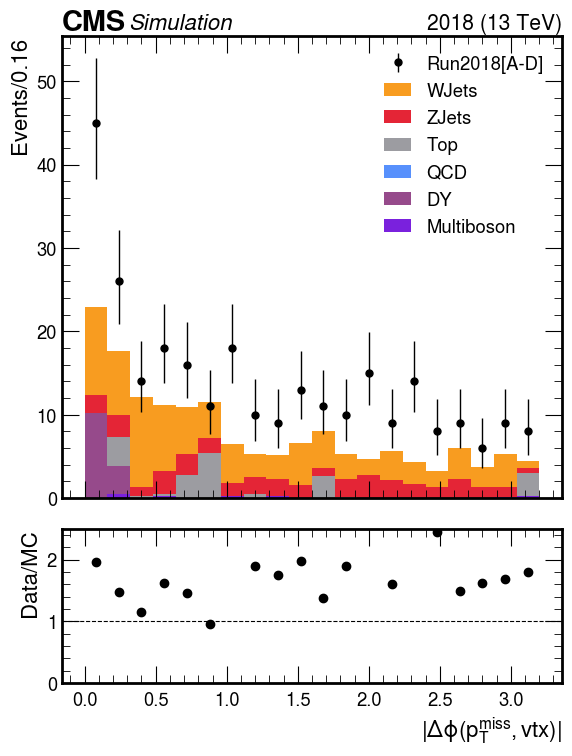

In [28]:
variable = 'sel_vtx_METdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"|$\Delta\phi(p^{miss}_{T},vtx)$|",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.16',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_chi2.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_chi2.png


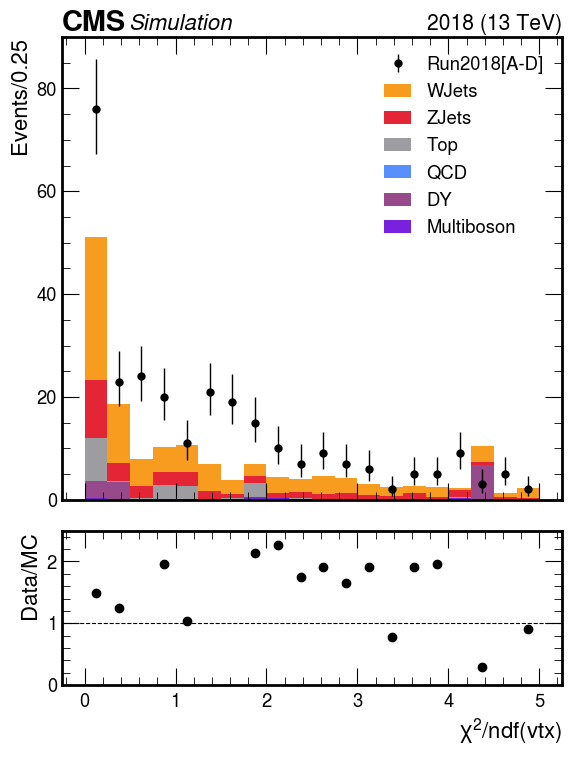

In [30]:
variable = 'sel_vtx_chi2'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\chi^{2}/ndf(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_pt.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_pt.png


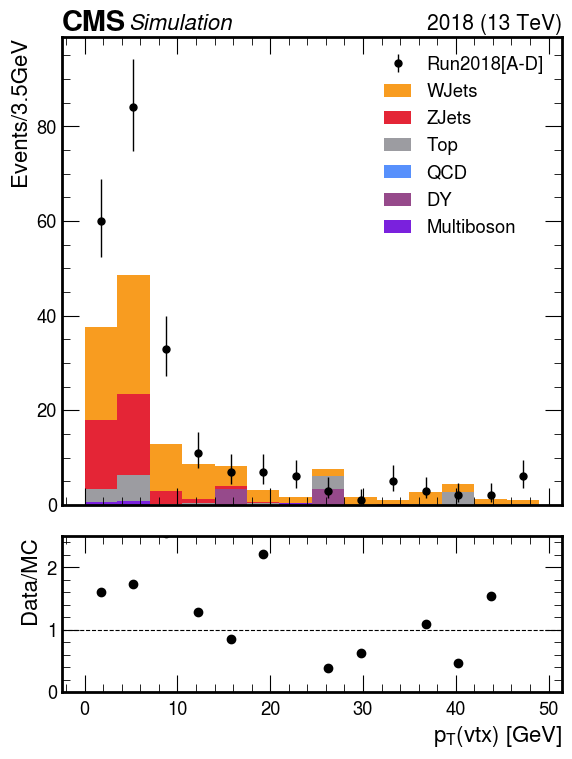

In [33]:
variable = 'sel_vtx_pt'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 7j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p_{T}(vtx)$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/3.5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_eta.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_eta.png


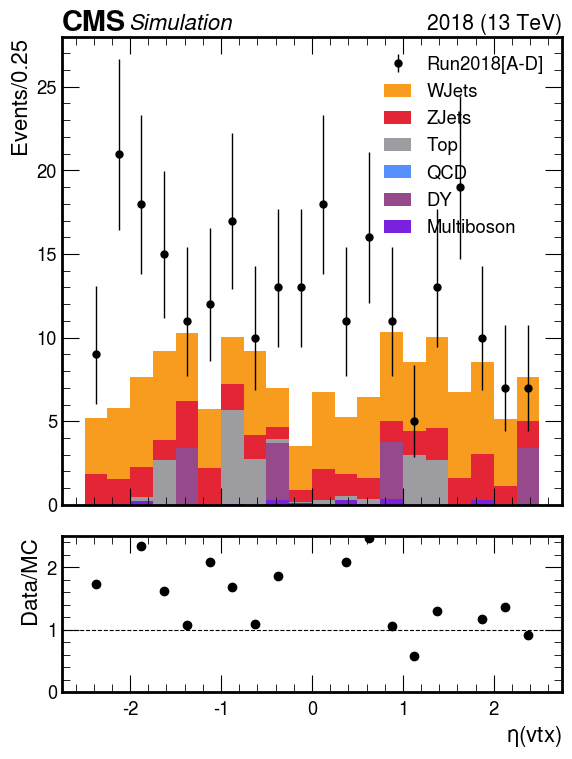

In [34]:
variable = 'sel_vtx_eta'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\eta(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_phi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_phi.png


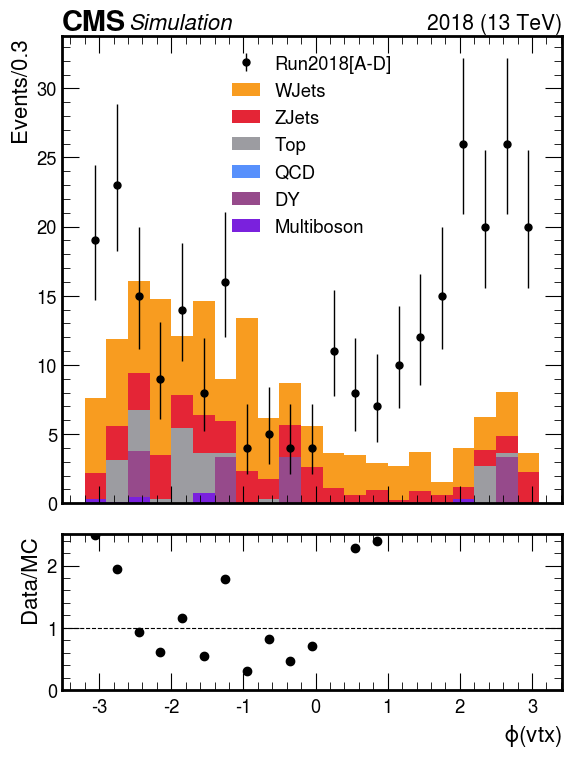

In [35]:
variable = 'sel_vtx_phi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\phi(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.3',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_type.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_type.png


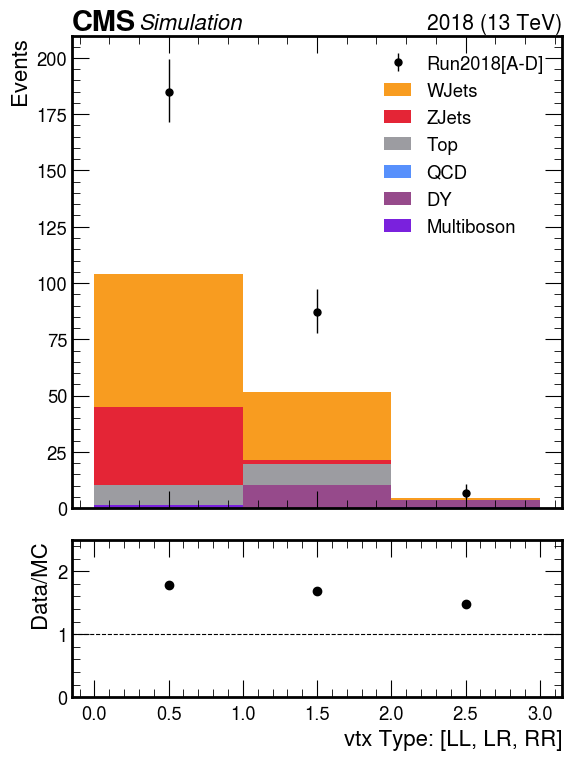

In [36]:
variable = 'sel_vtx_type'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'vtx Type: [LL, LR, RR]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_minEleDrJ.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_minEleDrJ.png


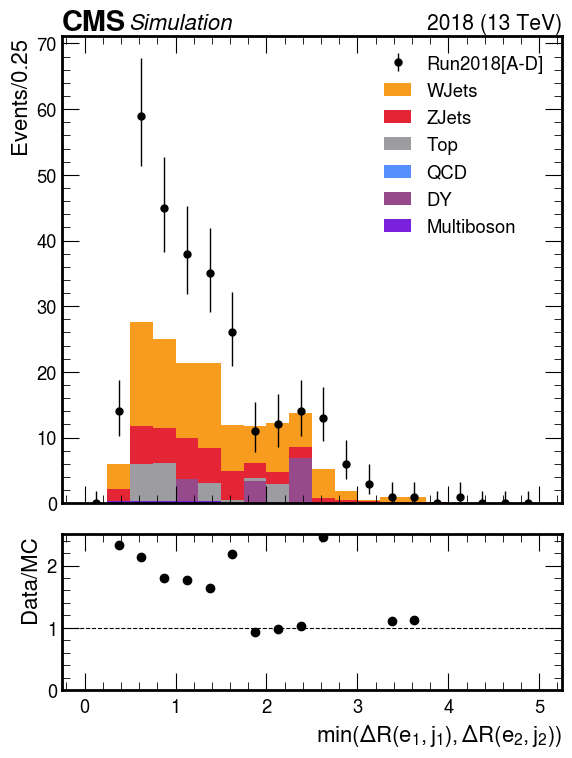

In [40]:
variable = 'sel_vtx_minEleDrJ'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min($\Delta R(e_{1},j_{1}),\Delta R(e_{2},j_{2}$))",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_low.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_low.png


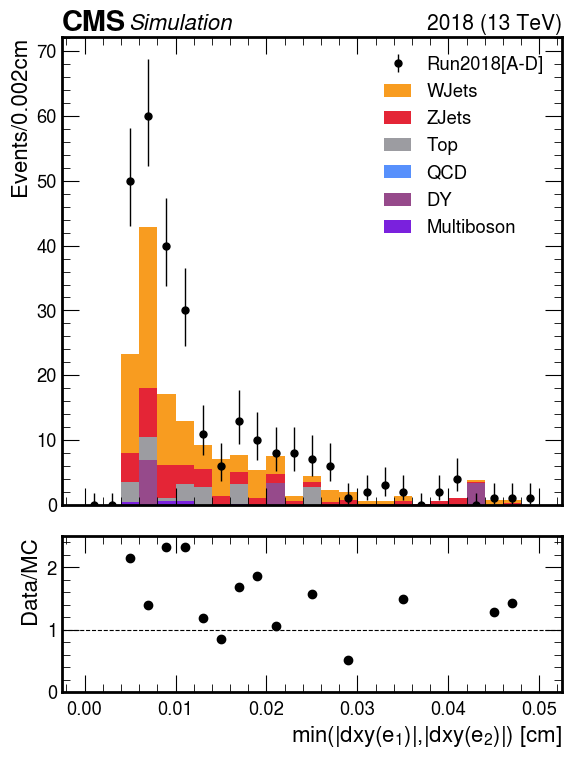

In [42]:
variable = 'sel_vtx_mindxy_low'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 20j,
    'xlim': [0,0.05],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min(|dxy($e_{1}$)|,|dxy($e_{2}$)|) [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.002cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_sign_etaProd.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_sign_etaProd.png


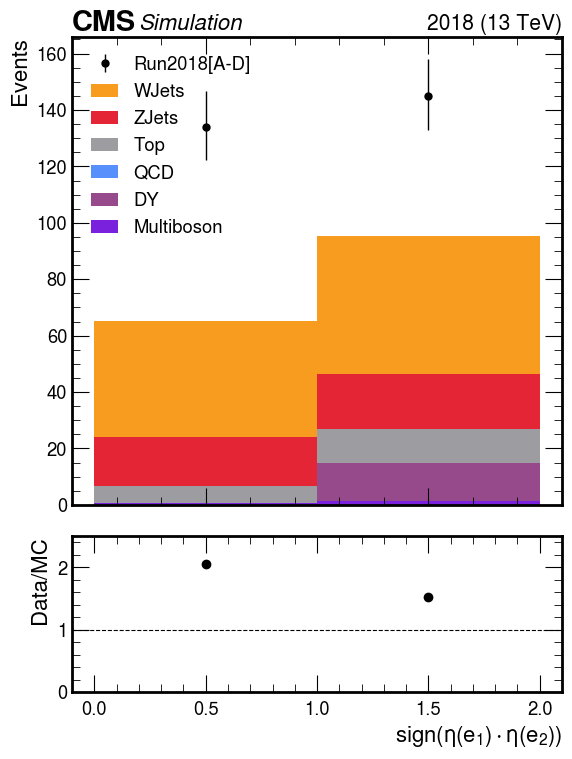

In [43]:
variable = 'sel_vtx_sign_etaProd'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"sign($\eta(e_{1}) \cdot \eta(e_{2})$)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl.png


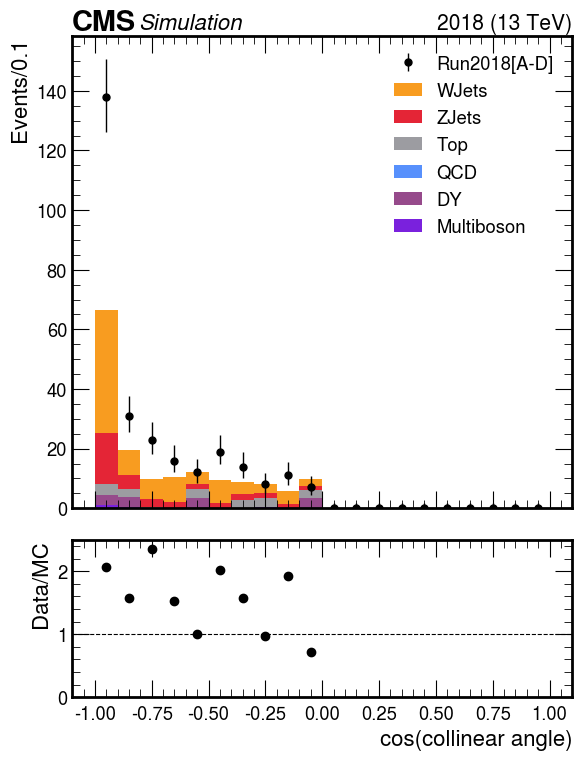

In [44]:
variable = 'sel_vtx_CosThetaColl'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"cos(collinear angle)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.1',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_maxMiniRelIsoCorr.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_maxMiniRelIsoCorr.png


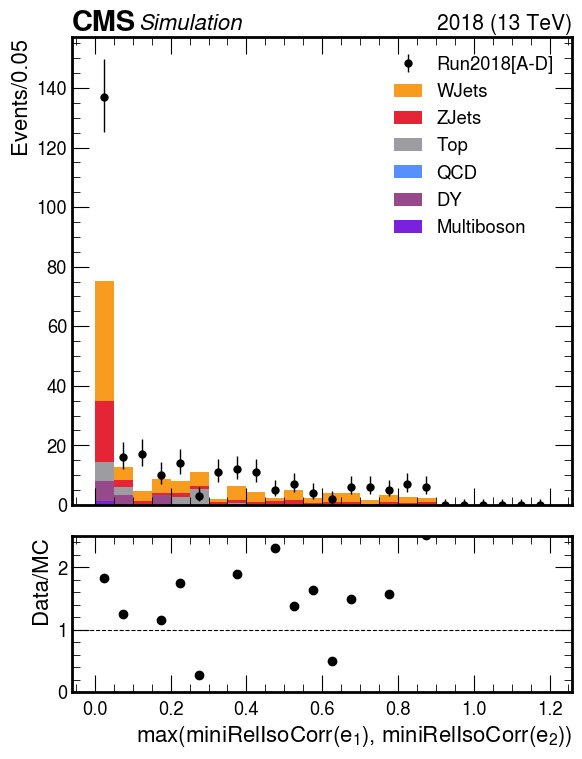

In [45]:
variable = 'sel_vtx_maxMiniRelIsoCorr'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,1.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'max(miniRelIsoCorr($e_{1}$), miniRelIsoCorr($e_{2}$))',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.05',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_PFMET.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/jetMET//data_VR_PFMET.png


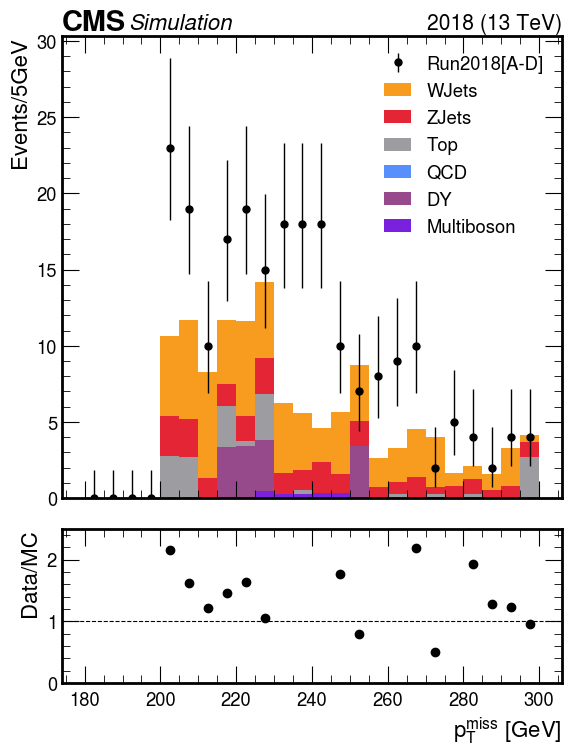

In [29]:
variable = 'PFMET'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [180,500],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p^{miss}_{T}$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_PFMET1000.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/jetMET//data_VR_PFMET1000.png


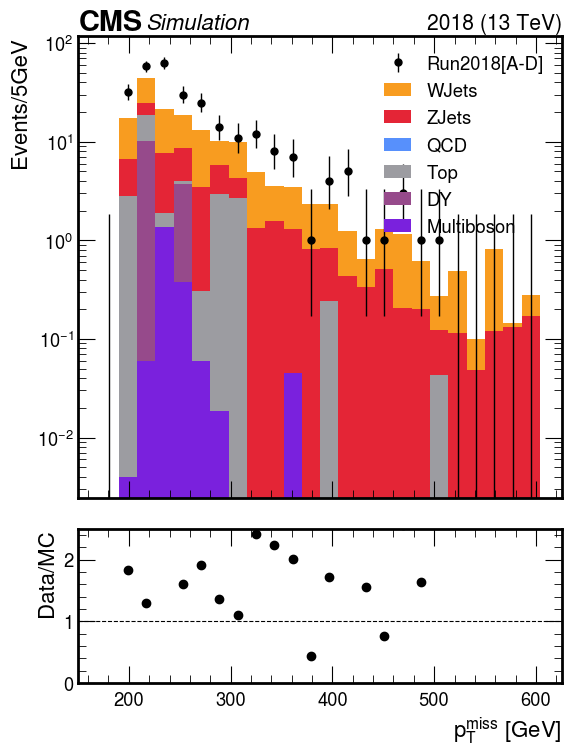

In [32]:
variable = 'PFMET1000'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [180,600],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p^{miss}_{T}$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

In [ ]:
variable = 'PFMETphi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut5',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_PVx.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_PVx.png


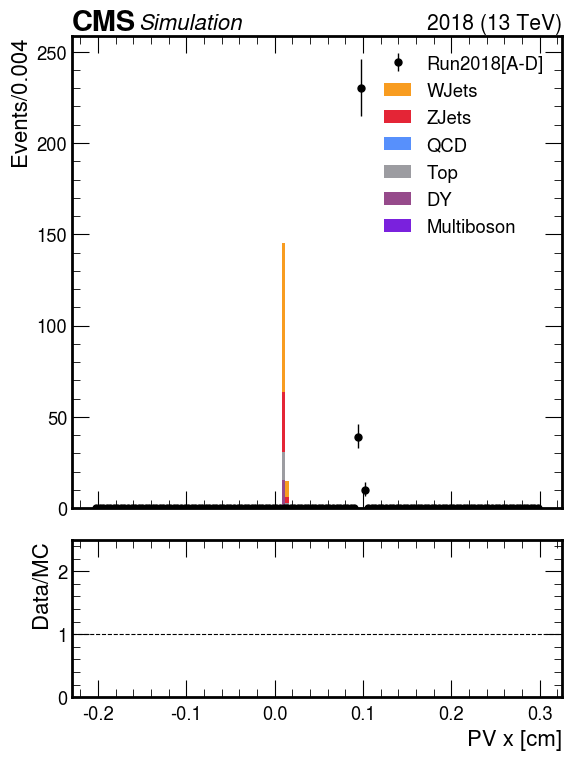

In [58]:
variable = 'PVx'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [-0.2,0.3],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'PV x [cm]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_PVy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_PVy.png


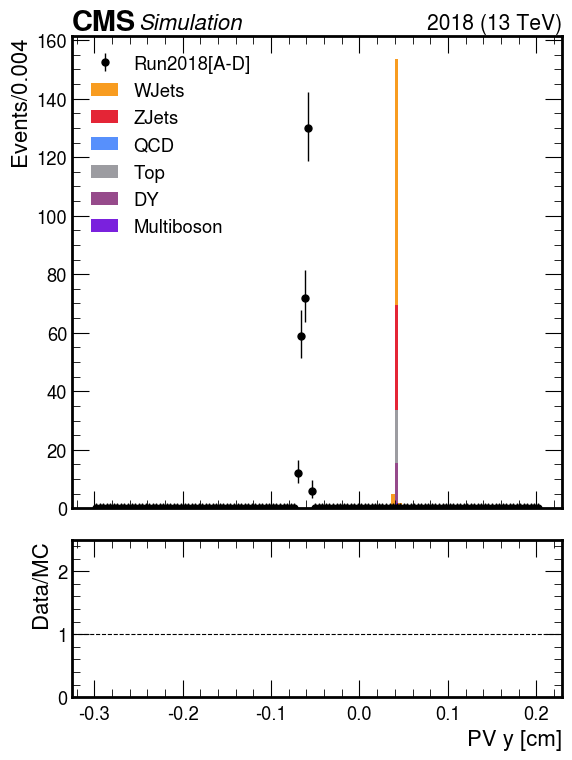

In [59]:
variable = 'PVy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [-0.3, 0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'PV y [cm]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e1_dxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg//data_VR_sel_e1_dxy.png


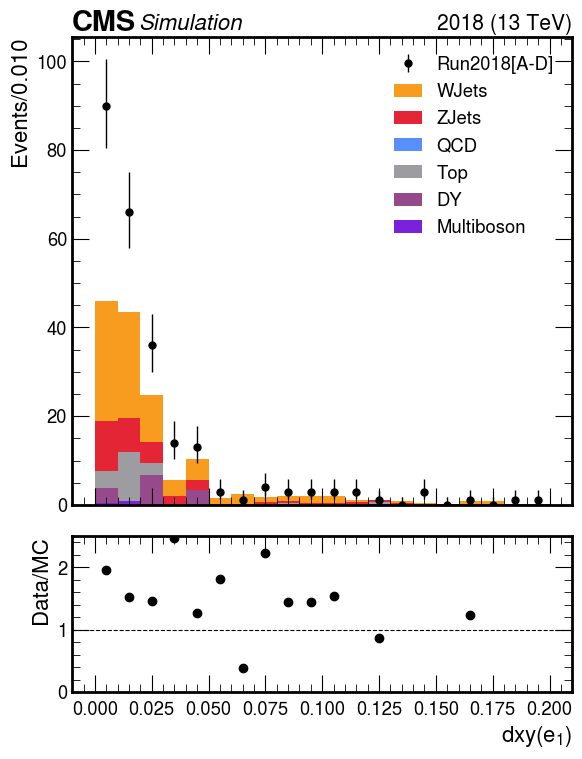

In [11]:
variable = 'sel_e1_dxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$dxy(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e2_dxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg//data_VR_sel_e2_dxy.png


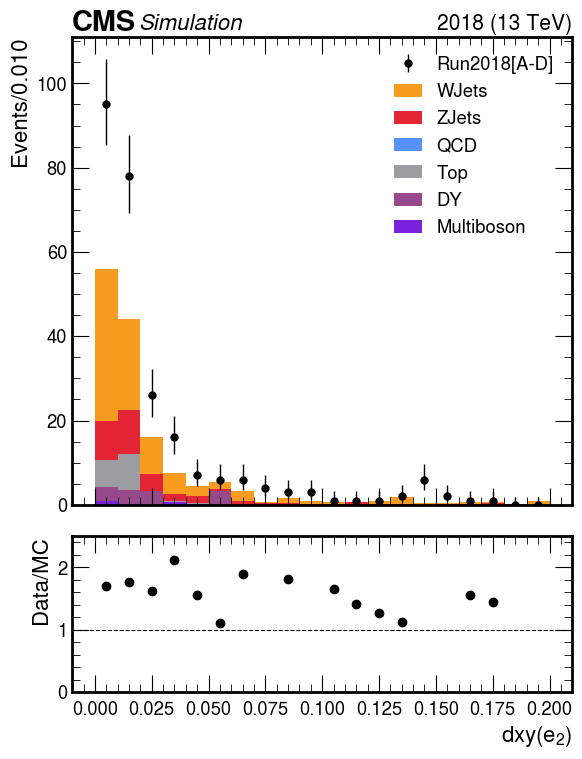

In [12]:
variable = 'sel_e2_dxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$dxy(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e1_vxy1.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_sel_e1_vxy1.png


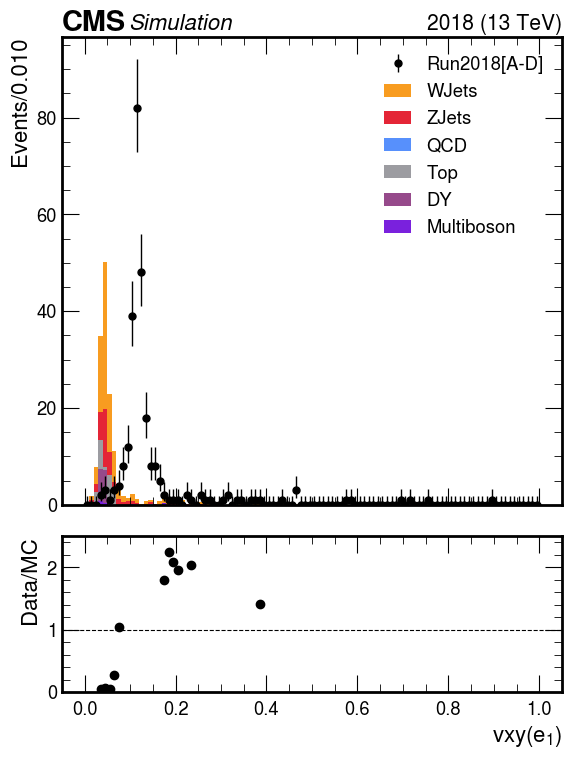

In [24]:
variable = 'sel_e1_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vxy(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e2_vxy1.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_sel_e2_vxy1.png


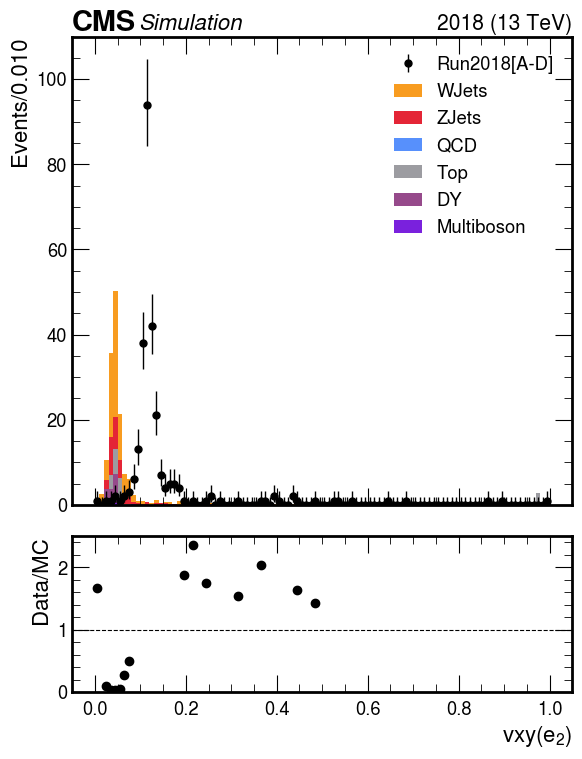

In [25]:
variable = 'sel_e2_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vxy(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e1_vz.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_sel_e1_vz.png


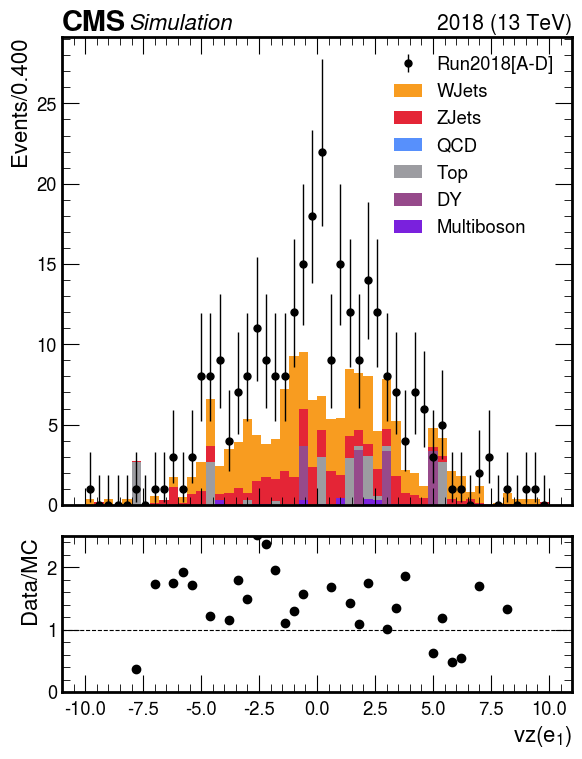

In [26]:
variable = 'sel_e1_vz'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vz(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg//data_VR_sel_e2_vz.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg//data_VR_sel_e2_vz.png


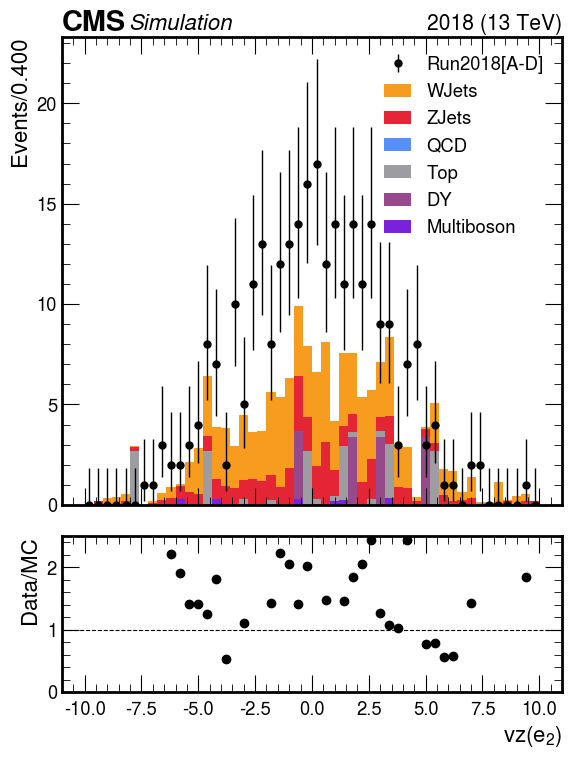

In [27]:
variable = 'sel_e2_vz'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vz(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_jetMETdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/jetMET//data_VR_jetMETdPhi.png


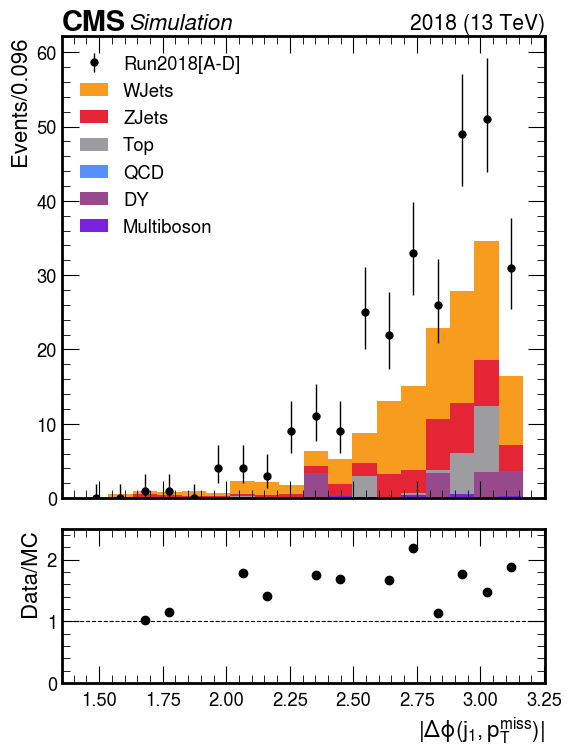

In [51]:
variable = 'jetMETdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': [1.5, 4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"|$\Delta\phi(j_{1}, p^{miss}_{T})$|",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.096',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots//data_VR_minJetMETdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots//data_VR_minJetMETdPhi.png


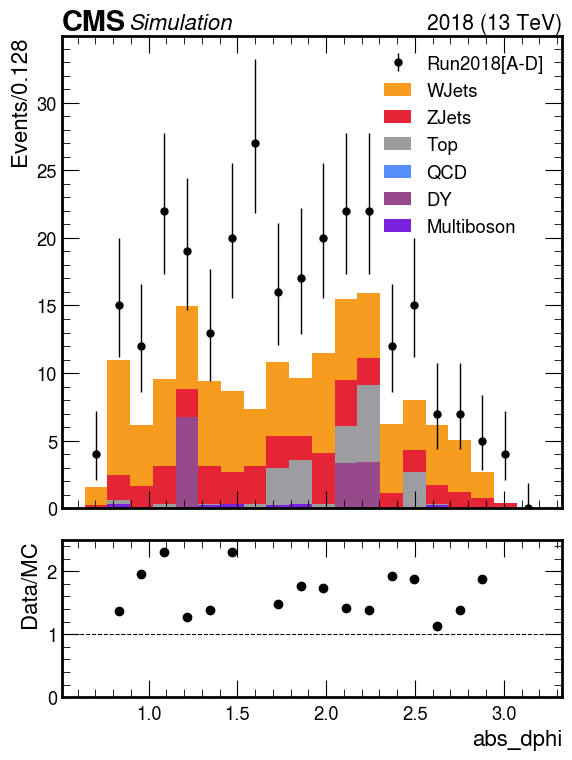

In [120]:
variable = 'minJetMETdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': [0.7, 4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_pt.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_pt.png


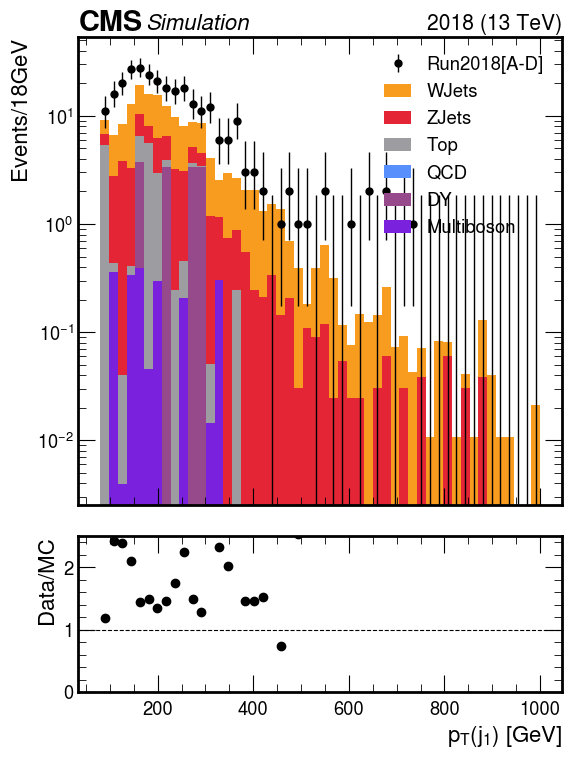

In [52]:
variable = 'lead_jet_pt'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p_{T}(j_{1})$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/18GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_eta.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_eta.png


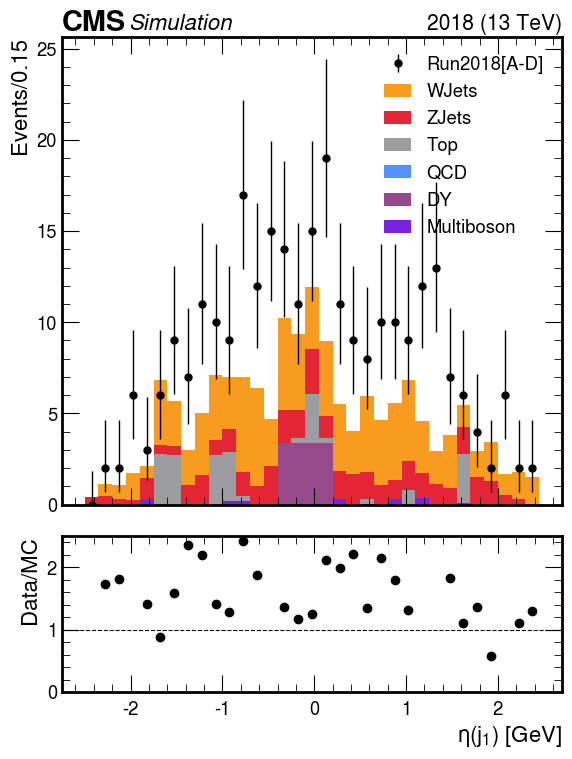

In [53]:
variable = 'lead_jet_eta'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\eta(j_{1})$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.15',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_jetMETratio.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1340: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/jetMET//data_VR_jetMETratio.png


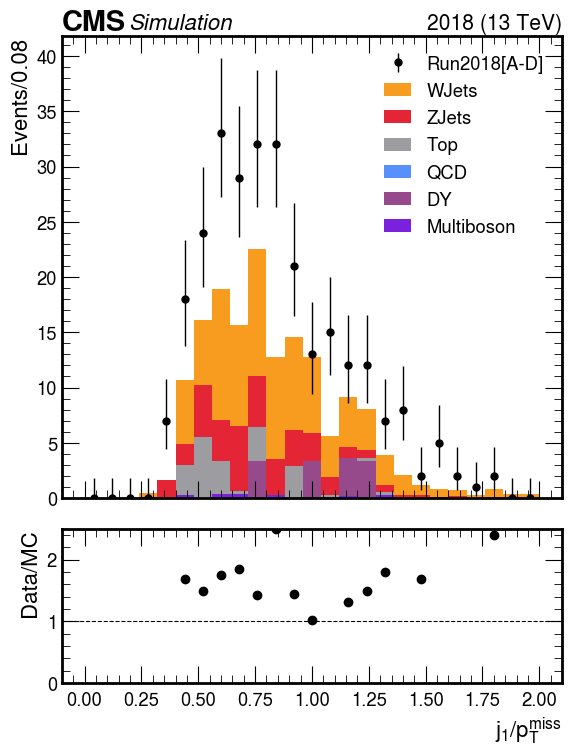

In [54]:
variable = 'jetMETratio'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$j_{1}/p^{miss}_{T}$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.08',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

### Plot 2D -- Background

Saved: ./plots//background_cut7_vx_vs_vy_all.png


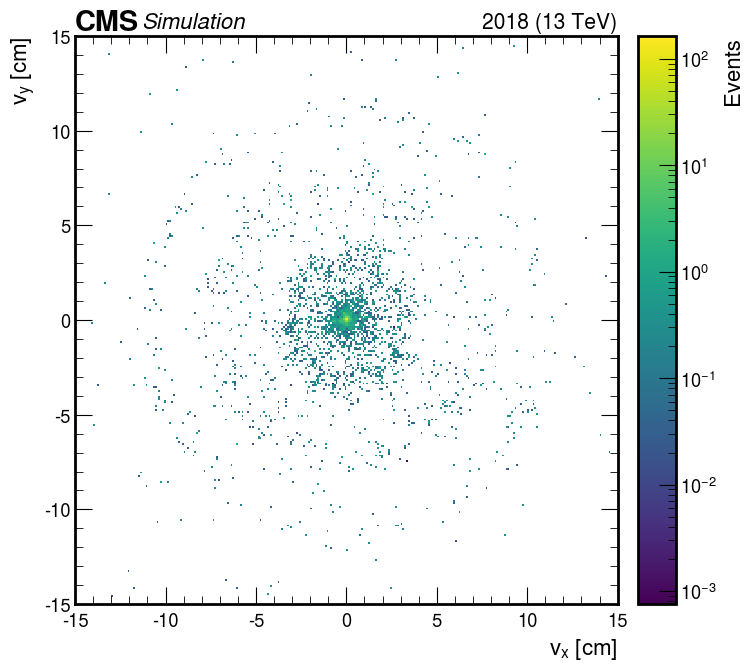

In [104]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'background_cut7_vx_vs_vy_all.png'
}

ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots//background_cut7_vx_vs_vy_WZjets.png


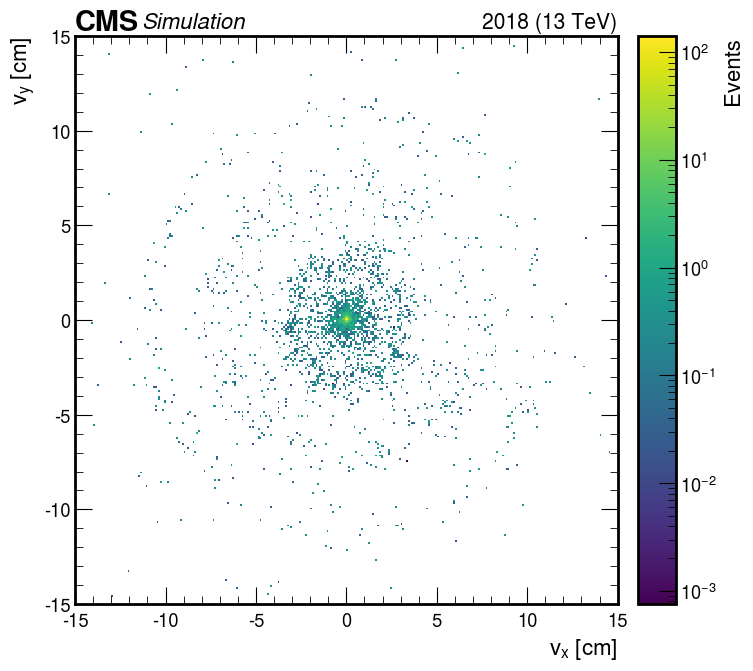

In [107]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'background_cut7_vx_vs_vy_WZjets.png'
}

ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = ['WJets', 'ZJets'])

### Plot 2D -- Signal

Saved: ./plots//signal_cut7_vx_vs_vy_m1_30_delta_0.1_ctau_100.png


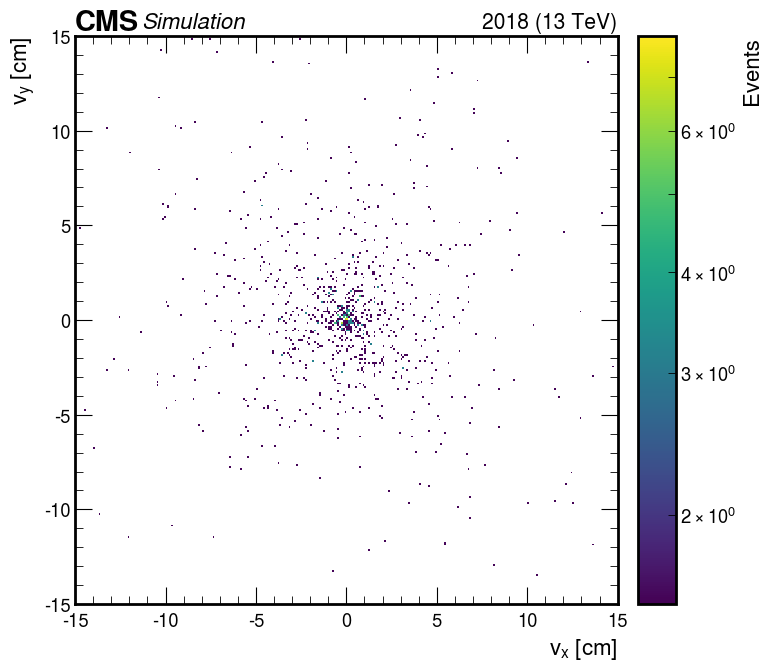

In [113]:
m1 = 30
delta = 0.1
ctau = 100

# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut7_vx_vs_vy_m1_{m1}_delta_{delta}_ctau_{ctau}.png'
}

ptools.plot_signal_2D(sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)